### 출처:  도서 <이것이 데이터 분석이다 with 파이썬>  윤기태 저


# 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석

In [2]:
# 데이터 셋 불러오기
import pandas as pd

# tsv 파일 경로 변수에 담기
file_path = '../data_with_python/chipotle.tsv'

# tsv 파일을 read_csv() 함수로 데이터 프레임 형태로 불러오기
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print("-----------------------------------")
print(chipo.info())

(4622, 5)
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


위의 소스코드에서 shape()와 info() 함수를 호출한 것을 확인할 수 있다. shape()는 데이터의 행과 열의 크기를 반환하고, info()는 행의 구성 정보와 열의 구성 정보를 나타낸다. 실행결과를 보면 데이터가 4,622개의 행과 5개의 피처로 구성되어 있는것을 알 수 있다. 또한 order_id와 quantity는 int64(숫자), 나머지 3개의 피처는 object(문자열) 타입으로 이루어져 있다는 것도 알 수 있다. 그 중에서 특이한 점은 choice_description 피처가 3,376개의 non-null object로 구성되어 있다는 것이다. 여기서 null이라는 용어는 데이터가 비어있는 것을 의미한다. 이를 결측값이라고 한다. 즉, '3,376 non-null object'라는 것은 3,376개의 비어 있지 않은 문자열 데이터가 있다는 정보다. 하지만 데이터의 개수는 4,622개 이므로 1,246개의 결측값이 존재한다는 것을 유추할 수 있다. columns(열의 목록), index(행의 목록) 또한 잘 알아두자.

In [3]:
# 데이터 셋 정보 확인하기

print(chipo.columns)
print("----------------------------------------")
print(chipo.index)

chipo.head(10)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------------------
RangeIndex(start=0, stop=4622, step=1)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


이제 본격적으로 피처들의 속성을 파악해보자. 우선 quantity와 item_price의 수치적 특징을 살펴보자. 이 두 피처는 연속형 피처이다. 연속형 피처는 키와 몸무게처럼 어떠한 값도 가질 수 있는 연속적인 숫자 형태를 의미한다. 

### 참고) 피처 형태의 종류
수치형 피처
- 연속형 피처: 어떤 구간 안의 모든 값을 데이터로써 가질 수 있다 ex) 키, 몸무게
- 비연속형 피처: 셀 수 있으며, 일정 구간 안에서 정해진 몇 개의 값을 가져야 한다. ex) 나이

범주형 피처
- 순서 있는 범주형 피처: 순서가 있으나 수치는 아니다. ex) 학점(A,B....F)
- 순서 없는 범주형 피처: 데이터가 구분되면서도 순서가 없다 ex) 혈액형

다음은 describe() 함수가 나타내는 피처의 기초 통계량이다. 여기서는 수치형 피처가 quantity가 유일하기 때문에 quantity에 대한 정보만을 출력한다.

In [4]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str로 변환한다.
chipo['order_id'] = chipo['order_id'].astype(str)

print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


출력 내용을 분석해보면 아이템의 평균 주문 수량(mean)은 약 1.07이라는 것을 알 수 있다. 이는 대부분이 한 아이템에 대해서 1개 정도만 주문했다는 뜻이고, '한 사람이 같은 메뉴를 여러개 구매하는 경우는 많지 않다'는 인사이트를 얻을 수 있다. 그렇다면 item_price의 수치적 특징은 어떻게 알아볼 수 있을까? 현재 item_price 피처는 object 타입이기 때문에 describe() 함수로 기초 통계량을 확인할 수 없다. 이를 위해서는 추가적인 데이터 전처리 작업이 필요하다.

다음으로 order_id와 item_name의 개수를 탐색해보자. 이 두 피처는 범주형 피처이기 때문에 unique() 함수를 사용한다. 이를 통해 피처 내에 몇 개의 범주가 있는지 확인할 수 있다.

In [5]:
# order_id 개수 출력
print(len(chipo['order_id'].unique()))   

# item_name 개수 출력
print(len(chipo['item_name'].unique()))

1834
50


이제 가장 많이 주문한 아이템 Top 10을 분석해보자. DataFrame['column']의 형태에 value_counts() 함수를 적용하는 방식을 사용하자. DataFrame['column']은 시리즈라는 객체를 반환하는데, value_counts() 함수는 오로지 이러한 시리즈 객체에만 적용된다.

In [6]:
# 가장 많이 주문한 아이템 Top 10 출력하기
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


이번에는 groupby() 함수를 이용하여 아이템별 주문 개수와 총량을 구해보자. 판다스의 groupby() 함수는 데이터프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연산을 적용할 수 있다. 예를 들어 '학급'이라는 그룹을 만들었을 때, '학급별 평균 키', '학급별 평균 몸무게' 등을 구하는 것과 같다.

In [7]:
# 아이템별 주문 개수와 총량 구하기
order_count = chipo.groupby('item_name')['order_id'].count()
# 아이템별 주문 개수 출력 (상위 10개)
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [8]:
# 아이템별 주문 총량 계산
item_quantity = chipo.groupby('item_name')['quantity'].sum()

# 아이템별 주문 총량 출력 (상위 10개)
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

위의 코드 order_count = chipo.groupby('item_name')['order_id'].count()는 chipo Data에서 item_name을 그룹으로 'order_id'피처의 count()를 계산한 것이다. 이는 아이템별 주문 개수를 의미한다. 마찬가지로 item_quantity = chipo.groupby('item_name')['quantity'].sum()은 아이템별 주문 총량을 나타낸다.

이제 아이템별 주문의 총량을 막대 그래프로 시각화해보자. tolist()와 넘파이의 arrange() 함수를 이용하여 x_pos를 선언하고, 0부터 50까지의 숫자를 그래프의 x축 이름으로 사용하자. 그 이유는 50개 아이템의 이름을 x축에 표현하기에는 그래프의 공간이 너무 협소하기 때문이다. y값(order_cnt)에는 주문 총량에 해당하는 값인 item_quantity.value.tolist()를 넣어주자.

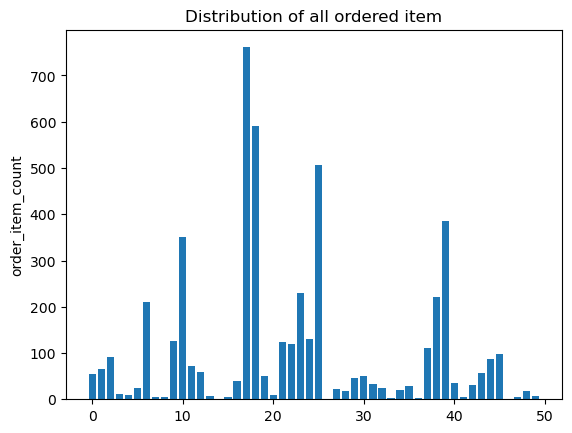

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('order_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [11]:
# item_price 피처 살펴보기
print(chipo.info())
print('-----------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-----------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

item_price 피처를 살펴본 결과, 가격을 나타내는 숫자 앞에 '$' 기호가 붙어있어서 수치 데이터로 사용할 수가 없다. 따라서 기호를 제거해주는 전처리 작업이 필요하다.
기호를 제거해주는 전처리 방법은 chipo['item_price']에 apply() 함수를 적용함으로써 가능하다. 그리고 apply() 함수에는 lambda라는 함수 명령어를 추가하자.

In [12]:
# column 단위 데이터에 apply() 함수로 전처리 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x :float(x[1:]))

chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


apply() 함수는 시리즈 단위의 연산을 처리하는 기능을 수행하며, sum()이나 mean()과 같이 연산이 정의된 함수를 파라미터로 받는다. 따라서 피처 단위의 합계나 평균을 구할 수도 있고, 새로운 함수 문자열 데이터에서 첫 번째 문자열을 제거한 뒤 나머지 문자열을 수치형으로 바꿔주는 함수를 파라미터로 입력할 수도 있다. 위의 코드 lambda x : float(x[1:])는 이를 수행하는 함수를 lambda로 정의하여 입력한 것이다.

다음 코드는 order_id로 그룹을 생성한 뒤, item_price 피처에 sum() 함수를 적용하고 mean() 함수를 추가한 것이다. 이를 통해 주문당 평균 계산 금액을 구할 수 있다.

In [13]:
# 주문당 평균 계산 금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

위의 결과에서 한 사람이 약 18달러 가량의 주문을 할 것이라는 인사이트를 얻을 수 있다.

다음으로 한 주문에 10달러 이상을 지불한 주문을 찾아보자. 우선 order_id 피처(하나의 주문)를 기준으로 그룹을 만들어 quantity, item_price 피처의 합계를 계산하자. 그리고 이 결과에서 10 이상인 값을 필터링해보자. 이에 대한 최종 결과인 results의 index.values를 출력하면 한 주문에 10달러 이상 지불한 id를 출력할 수 있다.

In [15]:
# 한 주문에 10달러 이상 지불한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()

results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


이번에는 각 아이템의 가격을 계산해보자. chipotle 데이터셋에서는 주어진 데이터만으로 각 아이템의 가격을 대략적으로 유추해야 한다. 유추 과정은 다음과 같다. 
1. chipo[chipo.quantity == 1]으로 동일 아이템을 1개만 구매한 주문을 선별한다.
2. item_name을 기준으로 groupby 연산을 수행한 뒤, min() 함수로 각 그룹별 최저가를 계산한다.
3. item_price를 기준으로 정렬하는 sort_values() 함수를 적용한다. sort_values()는 series 데이터를 정렬해주는 함수다.

In [16]:
# 각 아이템 가격 계산
chipo_one_item = chipo[chipo.quantity == 1]

price_per_item = chipo_one_item.groupby('item_name').min()

price_per_item.sort_values(by = 'item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


그리고 각 아이템의 대략적인 가격을 아래와 같이 2개의 그래프로 시각화하여 나타낼 수 있다. 각각의 그래프는 아이템의 가격 분포(위쪽 결과)와 가격 히스토그램(아래쪽 결과)을 나타낸다. 이를 통해 2~4달러, 혹은 6~8달러 정도에 아이템의 가격대가 형성되어 있음을 알 수 있다.

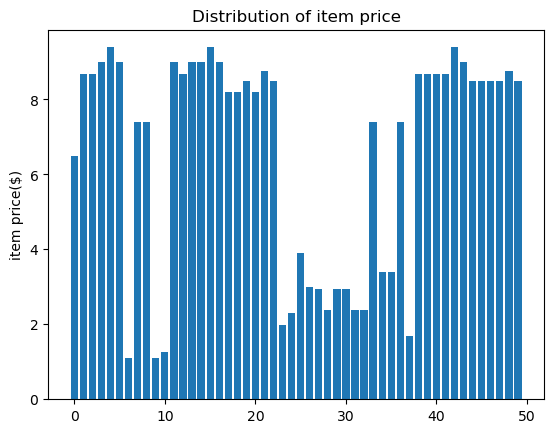

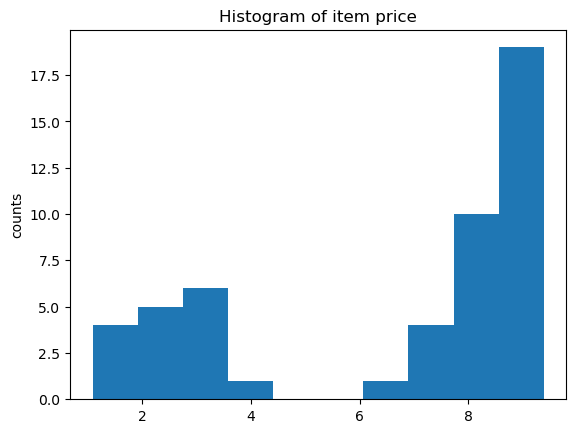

In [17]:
# 아이템 가격 분포 그래프 출력
item_name_list = price_per_item.index.tolist()

x_pos = np.arange(len(item_name_list))

item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align = 'center')

plt.ylabel('item price($)')

plt.title('Distribution of item price')

plt.show()

# 아이템 가격 히스토그램 출력
plt.hist(item_price)

plt.ylabel('counts')

plt.title('Histogram of item price')

plt.show()

가장 비싼 주문에서 아이템이 총 몇개 팔렸는지 구해보자. 이 질문에서도 마찬가지로 order_id에 그룹별 합계 연산을 적용한다. 그리고 item_price를 기준으로 sort_values를 반환하면 가장 비싼 주문순으로 연산 결과를 얻을 수 있다. 다음 결과에서는 가장 비싼 주문에서 23개의 아이템을 주문한 것을 알 수 있다.

In [18]:
# 가장 비싼 주문에서 아이템이 총 몇개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


이번에는 가게의 특정 아이템인 'Veggie Salad Bowl' 몇 번이나 주문되었는지 알아보자. 이를 위해 chipo[chipo['item_name'] == "Veggie Salad Bowl"]으로 필터링한 뒤, drop_duplicates()라는 함수를 사용해보자. 이는 한 주문 내에서 item_name이 중복 집계된 경우를 제거해주기 위함이다. 그리고 최종 결과인 chipo_salad의 길이를 출력하면 'Veggie Salad Bowl'이 데이터 내에서 몇 번이나 주문되었는지 구할 수 있다.

In [19]:
# 'Veggie Salad Bowl'이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]

chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))

chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


위의 결과로 "Veggie Salad Bowl"는 총 18번 주문되었다는 것을 알 수 있다.

비슷한 방법으로 "Chicken Bowl"을 2개 이상 주문한 횟수를 구해보자. 먼저 "Chicken Bowl"을 주문한 데이터만을 필터링한 뒤, 주문 번호를 기준으로 그룹을 선정하자. 그리고 sum() 함수를 적용한 결과에서 quantity를 선택하면 이 결과가 각 주문마다 "Chicken Bowl"을 주문한 횟수를 의미하게 된다. 그리고 2개 이상으로 필터링을 적용하면 된다.

In [20]:
# "Chicken Bowl"을 2개 이상 주문한 횟수 구하기
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]

chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']

chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))

chipo_chicken_result.head(5)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

위의 결과로 "Chicken Bowl"을 2개 이상 주문한 횟수는 총 114번인것을 알 수 있다.